In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
IMAGE_DIR = "./images"
IMAGE_EXTENSIONS = ['*.jpg', '*.jpeg', '*.png', '*.tif', '*.tiff']

In [3]:
TITLES = [
    "Original", "Filtro de Media", "Filtro Gaussiano", "Filtro de Mediana",
    "Laplaciano", "Sobel X", "Sobel Y", "Sobel Magnitud",
    "Erosión", "Dilatación", "Apertura", "Clausura", "Canny"
]

In [ ]:
def load_images(image_dir, extensions) -> dict:
    paths = [img for ext in extensions for img in glob.glob(os.path.join(image_dir, ext))]
    print(f"Se encontraron {len(paths)} imágenes")

    images = {}
    for path in paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images[os.path.basename(path)] = img
    return images

In [5]:
def apply_spatial_filters(images: dict) -> dict:
    spatial_results = {}
    for name, image in images.items():
        results = {
            'blur': cv2.blur(image, (5, 5)),
            'gaussian': cv2.GaussianBlur(image, (5, 5), 0),
            'median': cv2.medianBlur(image, 5),
            'laplacian': cv2.Laplacian(image, cv2.CV_64F),
            'sobel_x': cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3),
            'sobel_y': cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3),
        }
        results['sobel_mag'] = cv2.magnitude(results['sobel_x'], results['sobel_y'])
        results['canny'] = cv2.Canny(image, 100, 200)
        spatial_results[name] = results.copy()
    return spatial_results

In [6]:
def apply_morphological_filters(images: dict) -> dict:
    morph_results = {}
    kernel = np.ones((5, 5), np.uint8)
    for name, image in images.items():
        results = {
            'erosion': cv2.erode(image, kernel, iterations=1),
            'dilation': cv2.dilate(image, kernel, iterations=1),
            'opening': cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel),
            'closing': cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
        }
        morph_results[name] = results.copy()
    return morph_results

In [7]:
def show_images(image_name, original, spatial_results, morph_results, titles):
    images_to_show = [
        original,
        spatial_results['blur'],
        spatial_results['gaussian'],
        spatial_results['median'],
        spatial_results['laplacian'],
        spatial_results['sobel_x'],
        spatial_results['sobel_y'],
        spatial_results['sobel_mag'],
        morph_results['erosion'],
        morph_results['dilation'],
        morph_results['opening'],
        morph_results['closing'],
        spatial_results['canny']
    ]

    num_images = len(images_to_show)
    cols = 4
    rows = (num_images + cols - 1) // cols

    plt.figure(figsize=(12, 10))
    for i, (img, title) in enumerate(zip(images_to_show, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title, fontsize=10)
        plt.axis('off')

    plt.suptitle(f"Resultados para: {image_name}", fontsize=14)
    plt.tight_layout()
    plt.show()
    plt.close() 

In [10]:
# Ejecutar todo
images = load_images(IMAGE_DIR, IMAGE_EXTENSIONS)
spatial_filtered = apply_spatial_filters(images)
morphological_filtered = apply_morphological_filters(images)

Se encontraron 12 imágenes


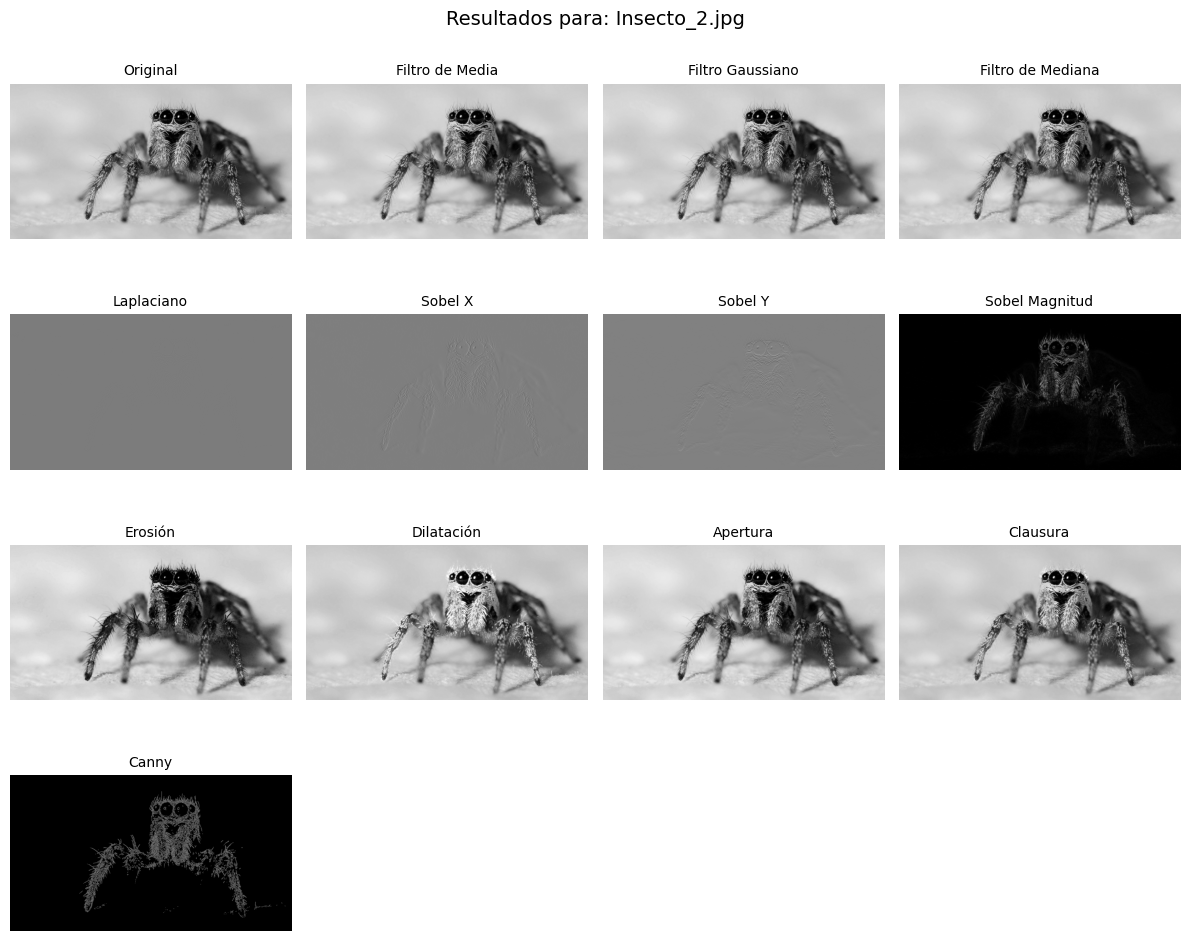

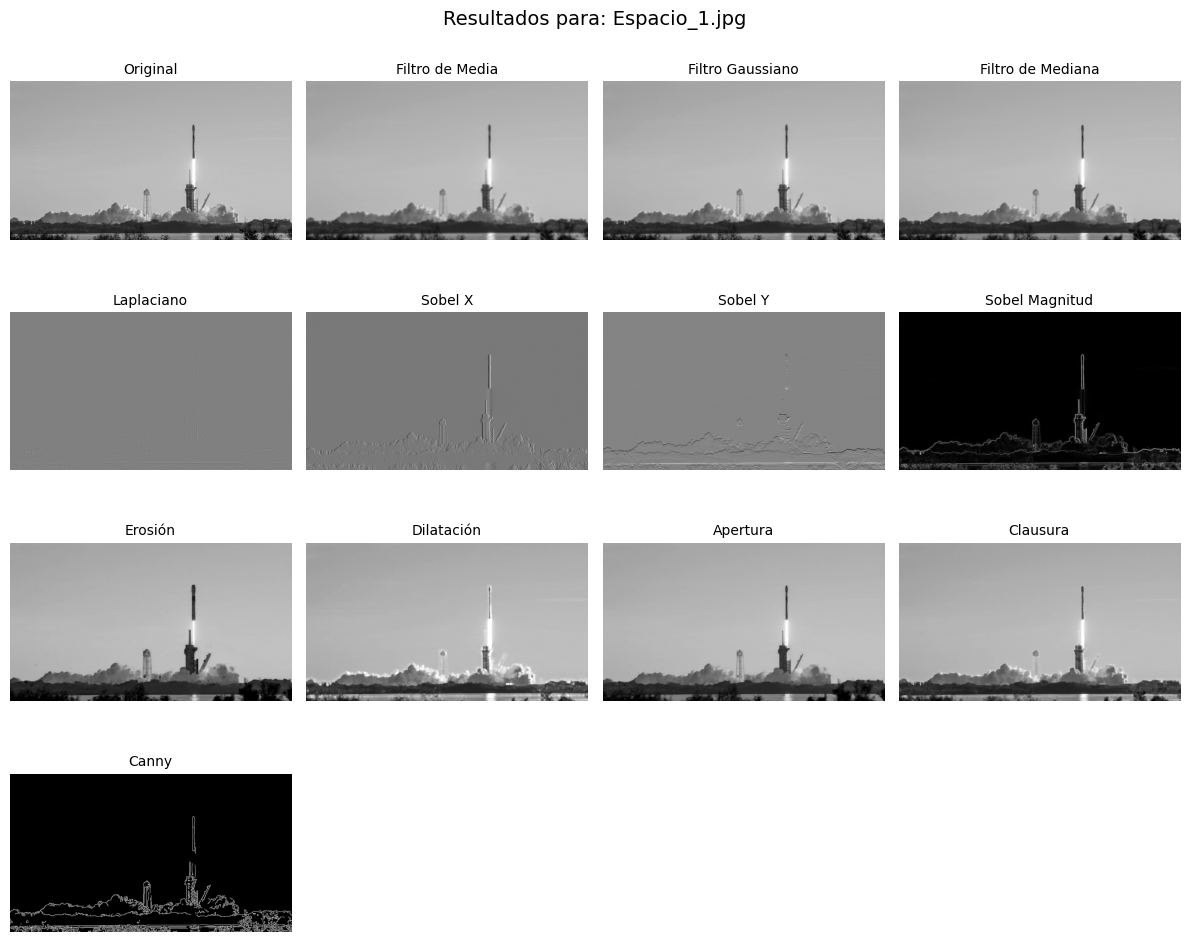

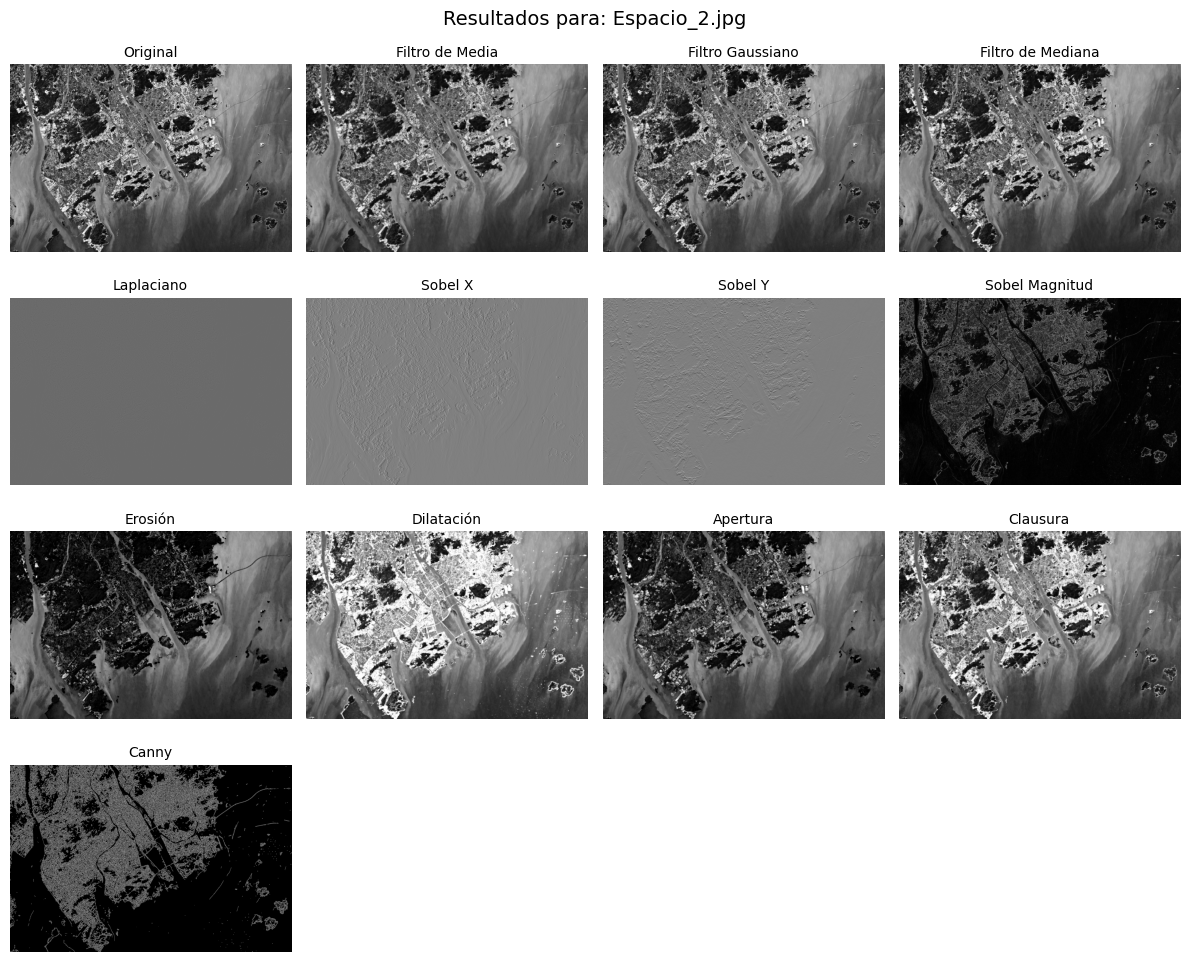

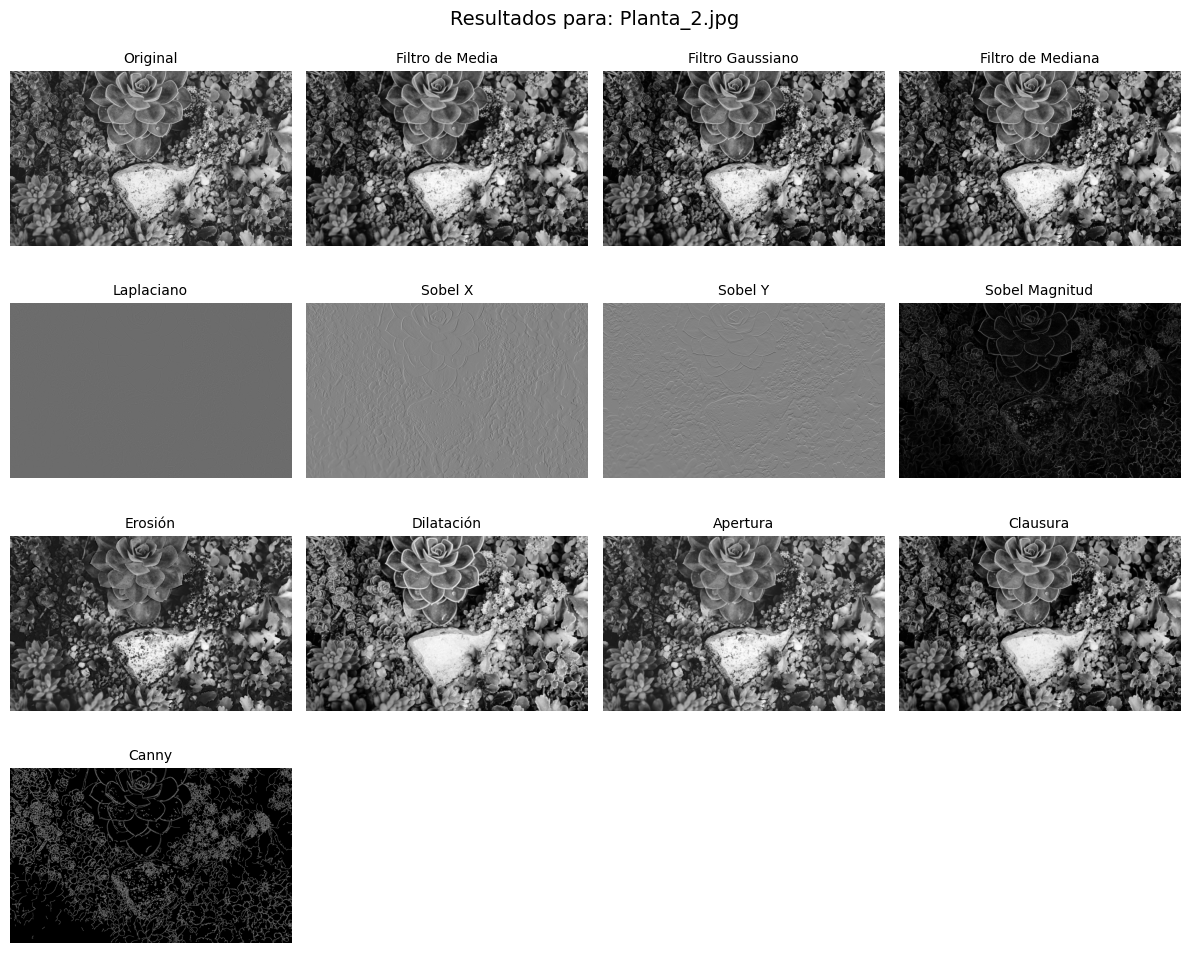

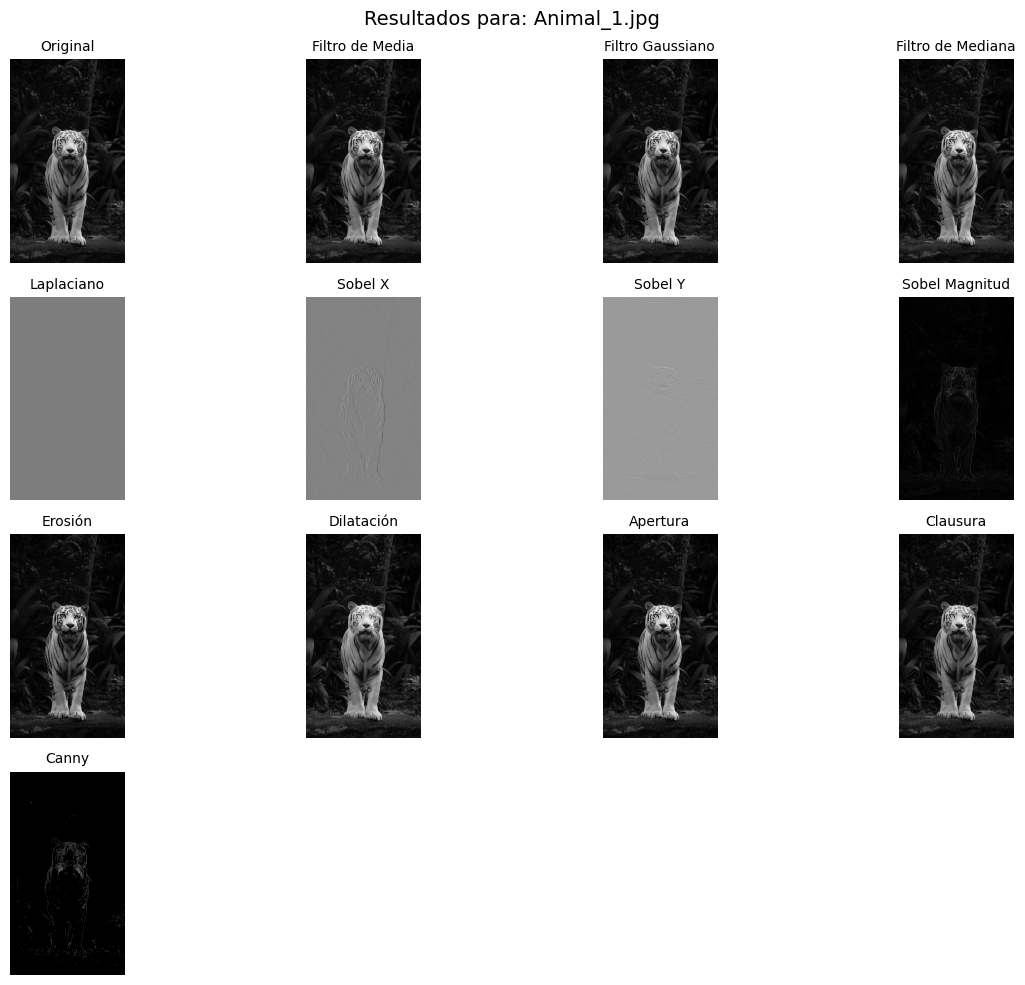

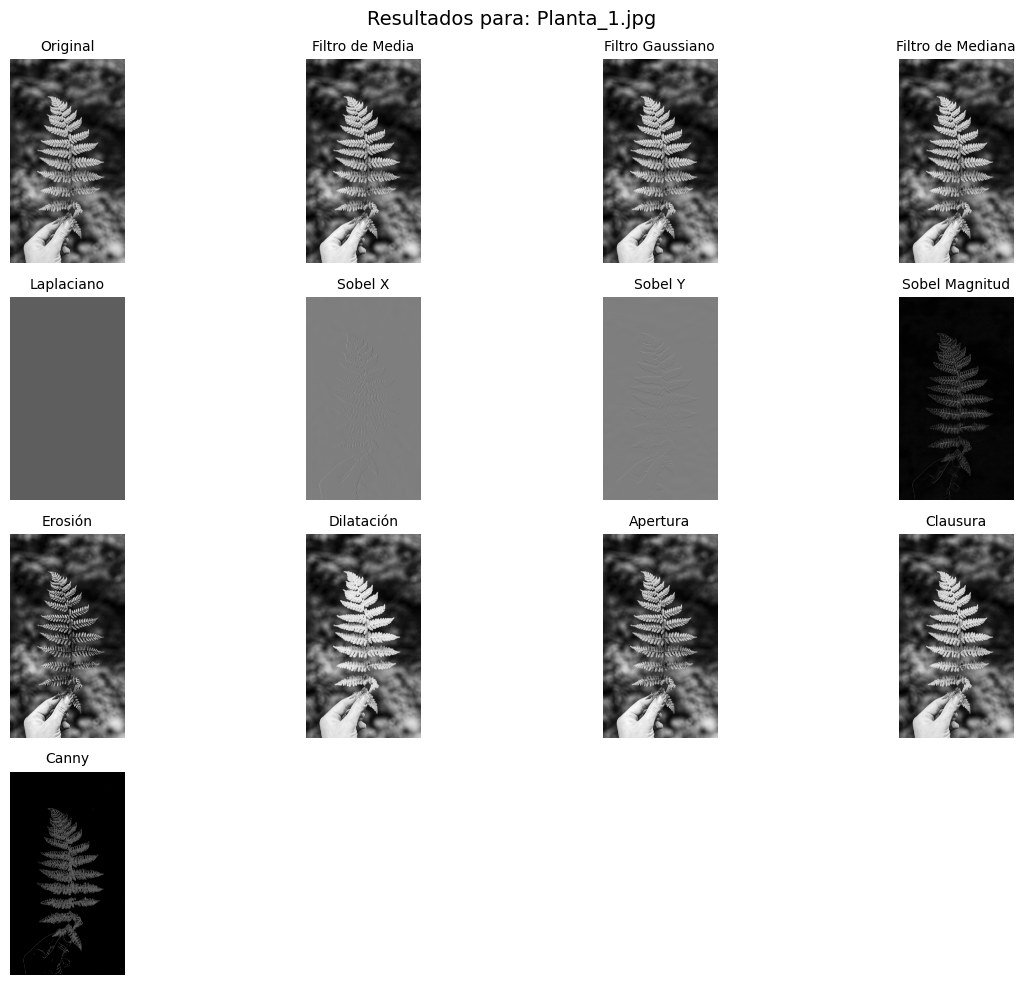

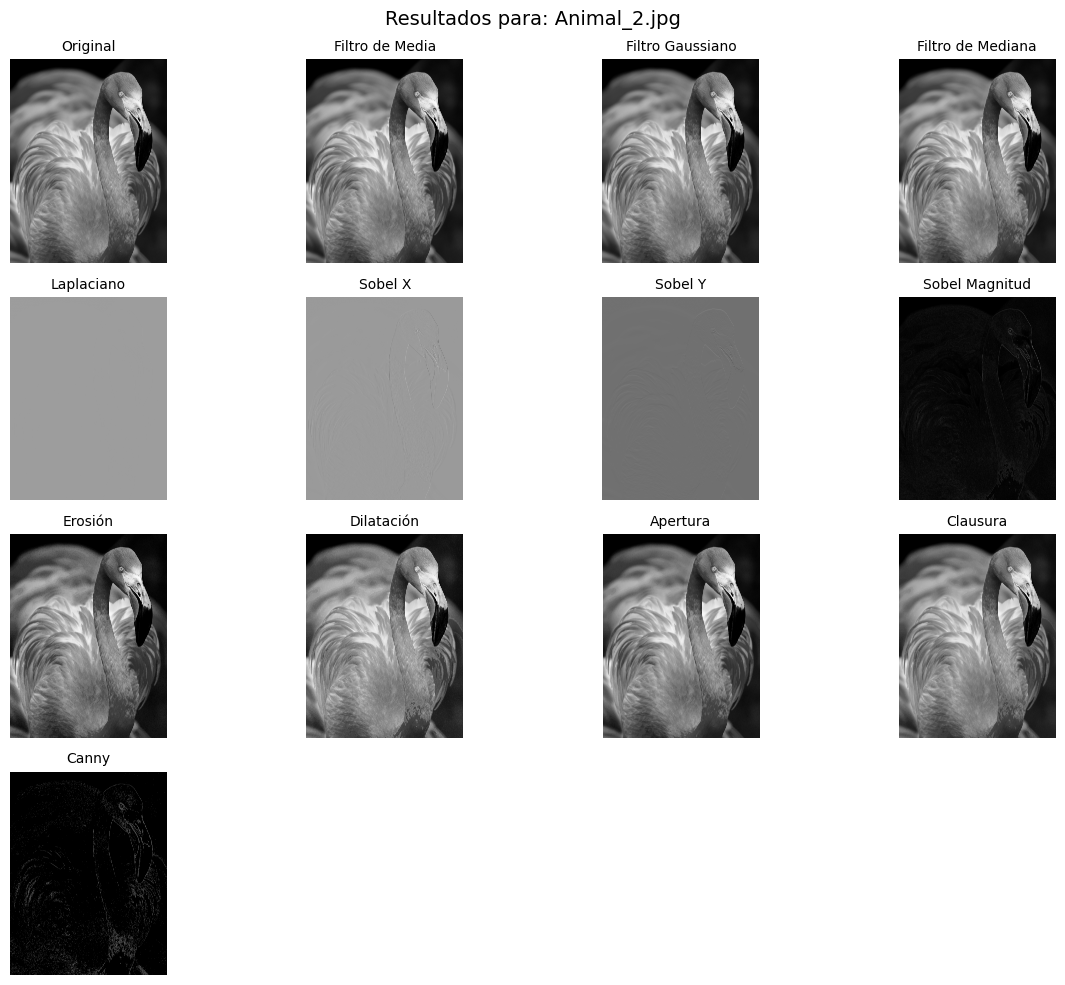

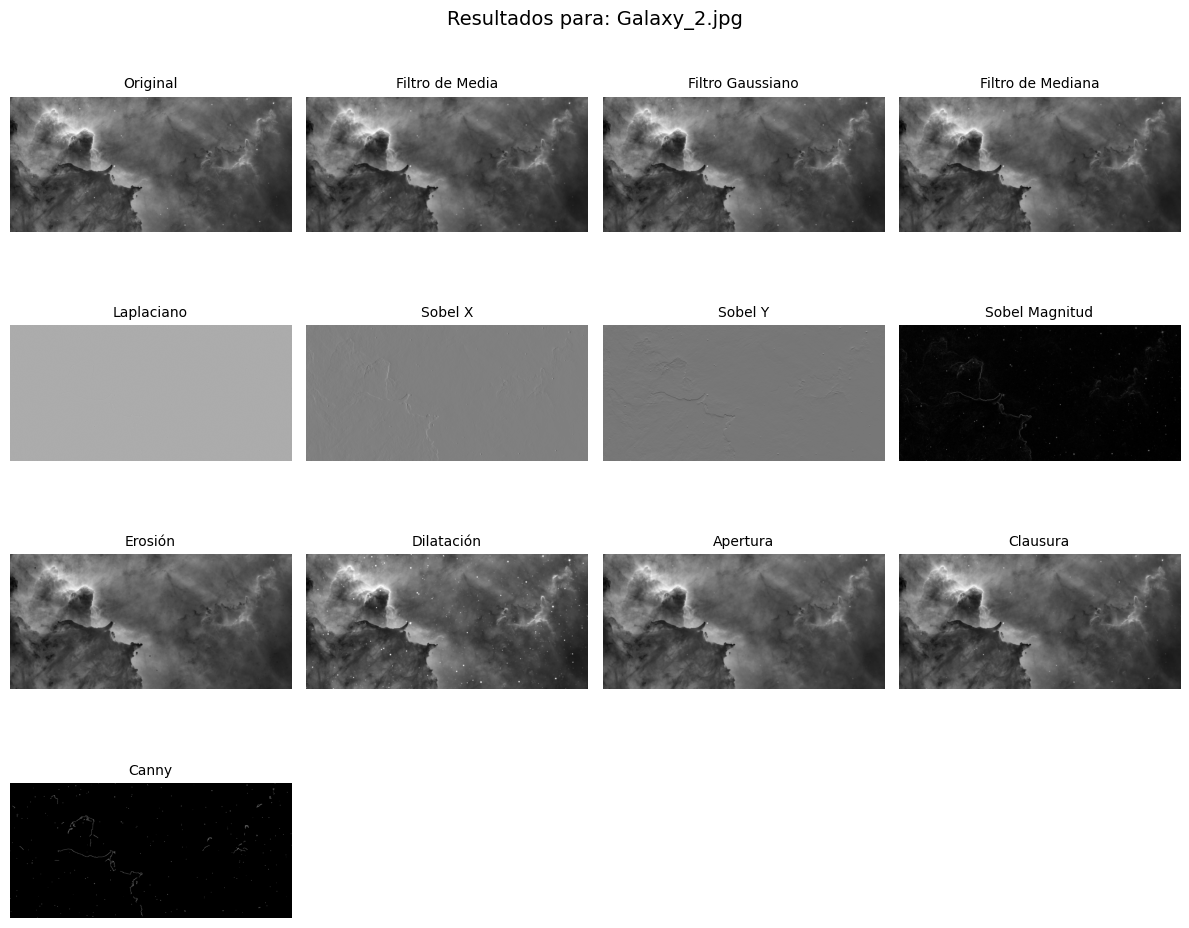

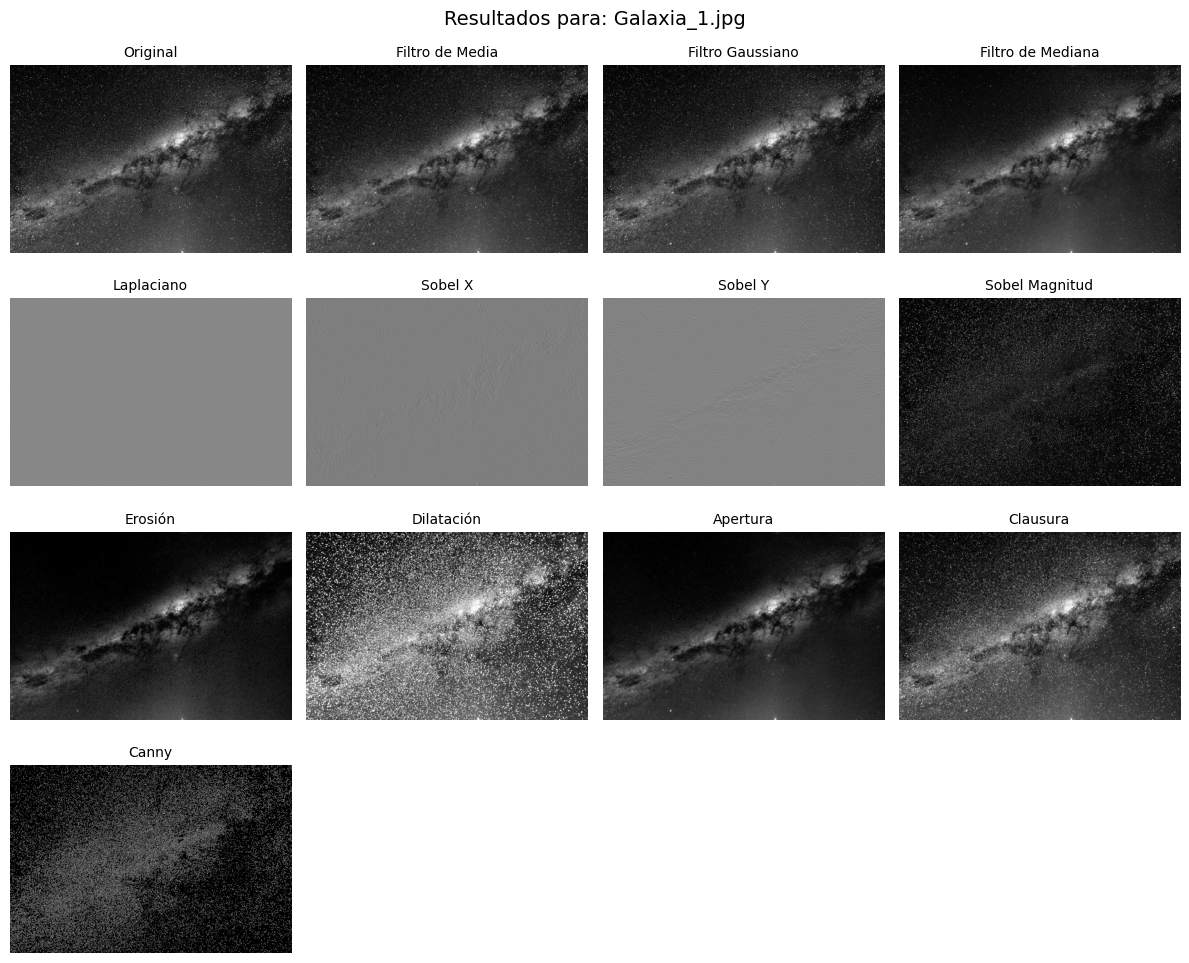

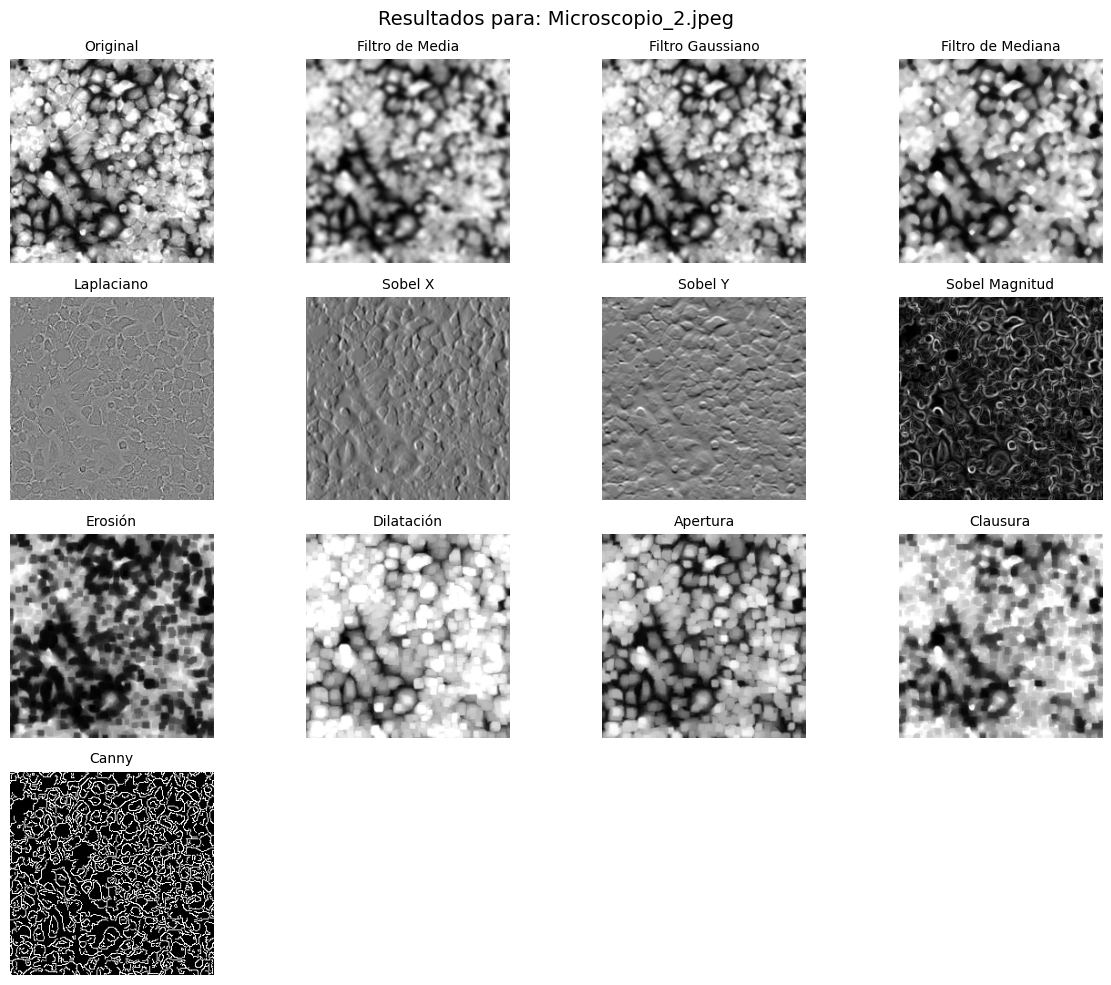

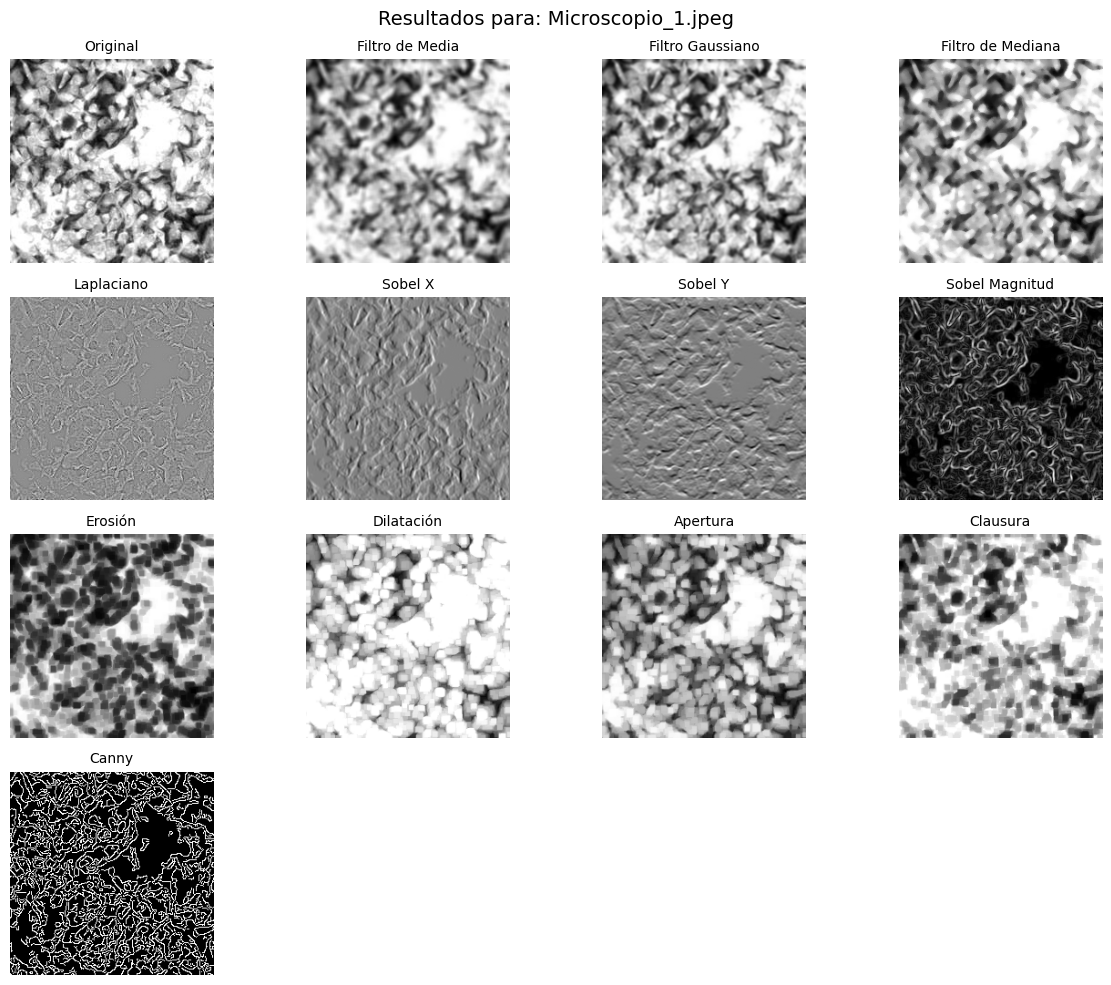

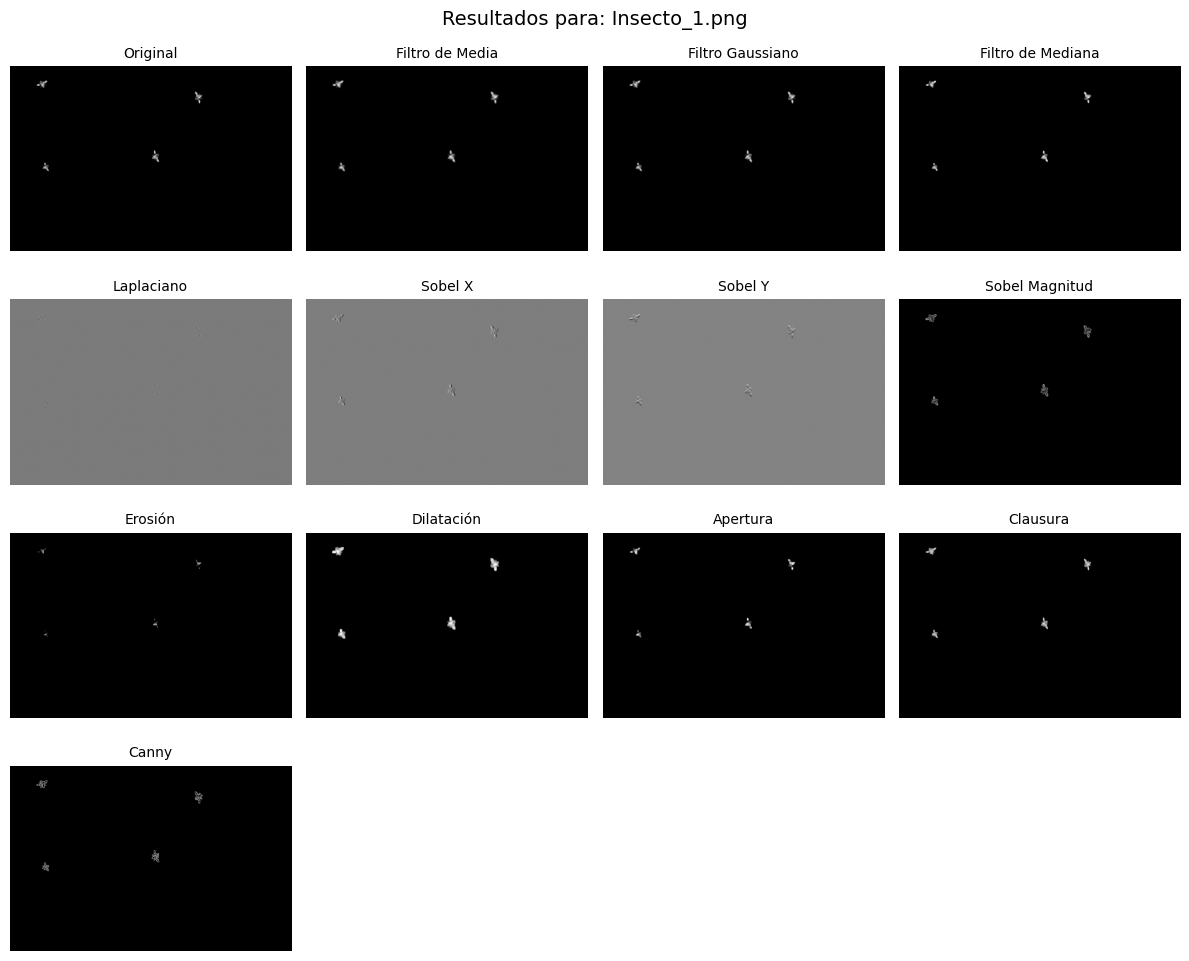

In [11]:
for name in images:
    show_images(
        image_name=name,
        original=images[name],
        spatial_results=spatial_filtered[name],
        morph_results=morphological_filtered[name],
        titles=TITLES
    )